In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
# Get the Data by help of pandas
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
# Data Exploration
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# DATA Analysis
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Show some rows from train dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


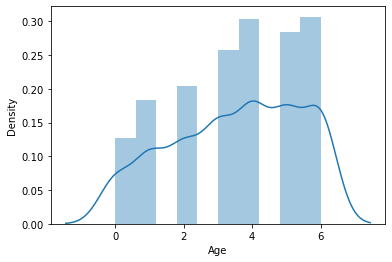

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


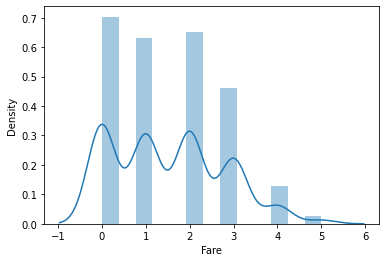

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


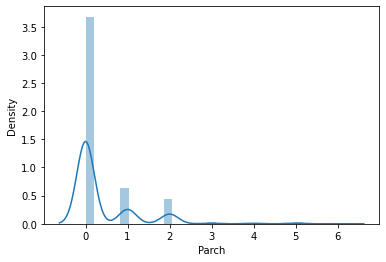

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


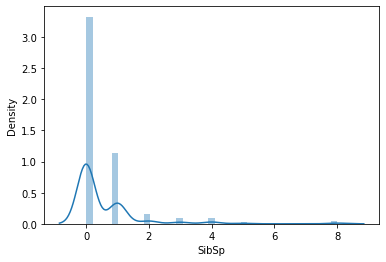

In [37]:
# Visualization
continuous_numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in continuous_numeric_features:
    sns.distplot(train[feature])
    plt.show()

In [6]:
# For Feature which are present in  dataset
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
# for "what data is actually missing?"
total = train.isnull().sum().sort_values(ascending=False)
p_1 = train.isnull().sum()/train.isnull().count()*100
p_2 = (round(p_1, 1)).sort_values(ascending=False)
missing = pd.concat([total, p_2], axis=1, keys=['Total', '%'])
missing.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


The 11 features plus the target variable (survived) are shown above.
What characteristics might lead to a high survival rate?
Everything except "PassengerId," "Ticket," and "Name" seem to be connected with a high survival rate, thus that makes sense to me.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


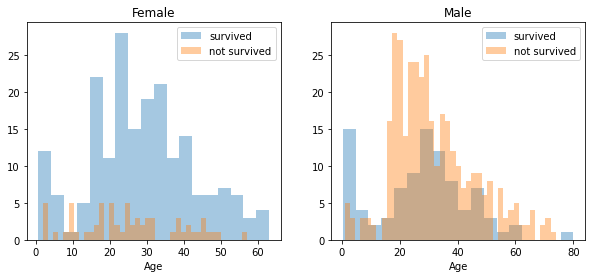

In [9]:
# Age and Sex

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


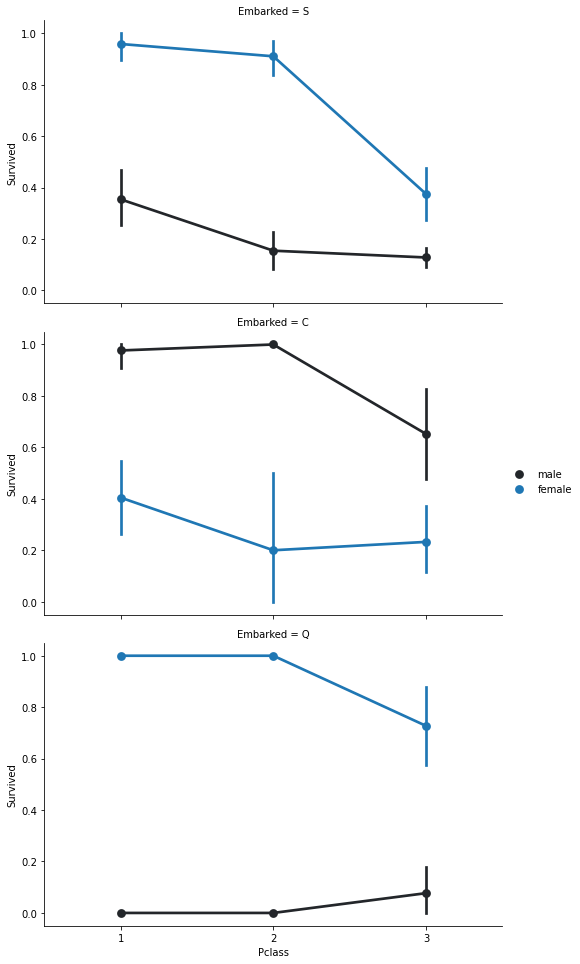

In [10]:
# Embarked, Pclass and Sex

FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


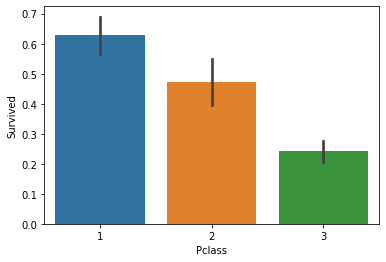

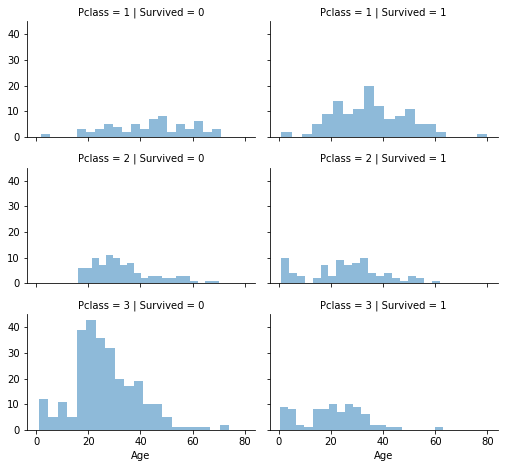

In [11]:
# Pclass

sns.barplot(x='Pclass', y='Survived', data=train)
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


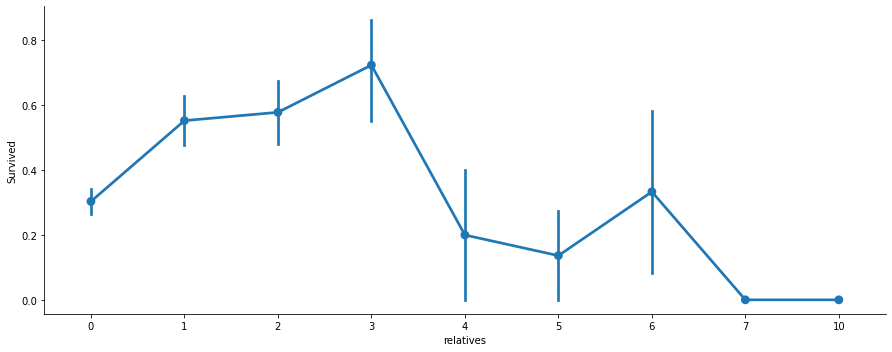

In [12]:
# SibSp and Parch

data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', data=train, aspect = 2.5)

In [13]:
# By passenger ID we can't find or being helped to find the survial rate so we drop the column.
train = train.drop(['PassengerId'], axis=1)

In [14]:
# Missing Data
# Recall that we have to take care of Cabin (687), Embarked (2), and Age (177).
#At first, I believed the 'Cabin' variable needed to be removed, but then I discovered something intriguing.
#'C123' is the appearance of a cabin number, and the letter stands for deck.
#In order to construct a new feature that includes a person's deck, we will extract these.
#The feature will then be turned into a numeric variable. The values that are missing will be changed to zero.
#The Titanic's actual decks, numbered A through G, are seen in the image below.

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [17]:
#Missing data from age
#We can now address the issue with the missing data for the age characteristics.
#I'll make an array of random integers that are calculated using the mean age value in relation to the standard deviation and the value of is_null.

data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
train["Age"].isnull().sum()

0

In [18]:
# Missing Data from Embarked
# We will just fill in the two missing values for the Embarked feature, since there are only two of them.
train['Embarked'].describe()
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [20]:
#Converting “Fare” from float to int64, using the “astype()” function pandas provides

data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [21]:
# In order to create a new feature, we will use the Name feature to extract the Titles from the Name.

data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [22]:
# Convert ‘Sex’ feature into numeric.

genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [23]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [24]:
# It will be challenging to organise the 681 distinct tickets in the Ticket property into usable groups.
# We'll thus remove it from the dataset.
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [25]:
# Convert ‘Embarked’ feature into numeric.

ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [26]:
# Convert ‘Age’ feature into some numeric group.

data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [27]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,5,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [28]:
# We must follow the same procedure as with the 'Age' feature for the 'Fare' feature.
# However, it's not so simple because 80% of the fare values would fall into the first category if we divided the range of values into a few equally large categories.
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [31]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [32]:
# Let's take a last look at the training set, before we start training the models.
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [33]:
# concat the train and test.
frames = [train, test]
data = pd.concat(frames)
y = list(map(lambda v: 'yes' if v == 1 else 'no', data['Survived'].values))
X = data[['Pclass', 'Sex', 'Age']].values
print(len(y))

1309


In [34]:
# We'll take 800 examples to train and the rest to the validation process
y_train = y[:800]
y_val = y[800:]

X_train = X[:800]
X_val = X[800:]

NaiveBayes Implementation 

In [35]:
class NaiveBayesClassifier:
    
    def __init__(self, X, y):
        self.X, self.y = X, y 
        
        self.N = len(self.X) # Length of the training set

        self.dim = len(self.X[0]) # Dimension of the vector of features

        self.attrs = [[] for _ in range(self.dim)] # Here we'll store the columns of the training set

        self.output_dom = {} # Output classes with the number of ocurrences in the training set. In this case we have only 2 classes

        self.data = [] # To store every row [Xi, yi]
        
        
        for i in range(len(self.X)):
            for j in range(self.dim):
                # if we have never seen this value for this attr before, 
                # then we add it to the attrs array in the corresponding position
                if not self.X[i][j] in self.attrs[j]:
                    self.attrs[j].append(self.X[i][j])
                    
            # if we have never seen this output class before,
            # then we add it to the output_dom and count one occurrence for now
            if not self.y[i] in self.output_dom.keys():
                self.output_dom[self.y[i]] = 1
            # otherwise, we increment the occurrence of this output in the training set by 1
            else:
                self.output_dom[self.y[i]] += 1
            # store the row
            self.data.append([self.X[i], self.y[i]])
            
            

    def classify(self, entry):

        solve = None # Final result
        max_arg = -1 # partial maximum

        for y in self.output_dom.keys():

            prob = self.output_dom[y]/self.N # P(y)

            for i in range(self.dim):
                cases = [x for x in self.data if x[0][i] == entry[i] and x[1] == y] # all rows with Xi = xi
                n = len(cases)
                prob *= n/self.N # P *= P(Xi = xi)
                
            # if we have a greater prob for this output than the partial maximum...
            if prob > max_arg:
                max_arg = prob
                solve = y

        return solve

In [36]:
# Find the Accuracy of NaiveBayes Model

nbc = NaiveBayesClassifier(X_train, y_train)
total_cases = len(y_val)

good = 0
bad = 0

for i in range(total_cases):
    predict = nbc.classify(X_val[i])
    if y_val[i] == predict:
        good += 1
    else:
        bad += 1

print('TOTAL Cases:', total_cases)
print('RIGHT:', good)
print('WRONG:', bad)
print('ACCURACY:', good/total_cases)

TOTAL Cases: 509
RIGHT: 424
WRONG: 85
ACCURACY: 0.8330058939096268


Accuracy: 0.7829131652661064


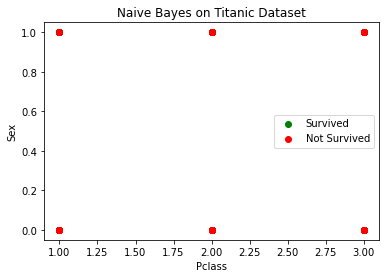

In [2]:
# Another way to do it 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Preprocess the data
titanic_data = titanic_data[['Pclass', 'Sex', 'Age', 'Survived']]
titanic_data.dropna(inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Split the data into features and labels
X = titanic_data[['Pclass', 'Sex', 'Age']].values
y = titanic_data['Survived'].values

# Separate the data by class
X_survived = X[y == 1]
X_not_survived = X[y == 0]

# Calculate the mean and standard deviation for each feature by class
means_survived = np.mean(X_survived, axis=0)
stds_survived = np.std(X_survived, axis=0)
means_not_survived = np.mean(X_not_survived, axis=0)
stds_not_survived = np.std(X_not_survived, axis=0)

# Define the Gaussian probability density function
def gaussian_pdf(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Predict the labels using Naive Bayes
predictions = []

for sample in X:
    p_survived = len(X_survived) / len(X)
    p_not_survived = len(X_not_survived) / len(X)
    
    p_features_survived = np.prod(gaussian_pdf(sample, means_survived, stds_survived))
    p_features_not_survived = np.prod(gaussian_pdf(sample, means_not_survived, stds_not_survived))
    
    p_survived_given_features = p_survived * p_features_survived
    p_not_survived_given_features = p_not_survived * p_features_not_survived
    
    predicted_label = 1 if p_survived_given_features > p_not_survived_given_features else 0
    predictions.append(predicted_label)

# Calculate the accuracy of the predictions
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

# Visualize the results
survived_indices = np.where(y == 1)[0]
not_survived_indices = np.where(y == 0)[0]

plt.scatter(X[survived_indices, 0], X[survived_indices, 1], c='g', label='Survived')
plt.scatter(X[not_survived_indices, 0], X[not_survived_indices, 1], c='r', label='Not Survived')
plt.xlabel('Pclass')
plt.ylabel('Sex')
plt.title('Naive Bayes on Titanic Dataset')
plt.legend()
plt.show()